In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [3]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.shape

(2200, 8)

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15172\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

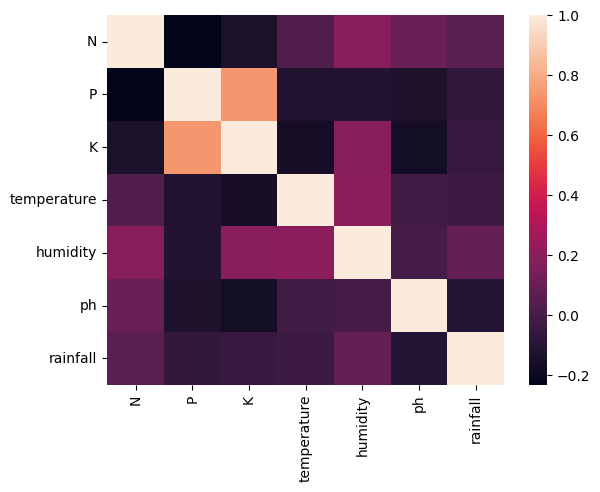

In [8]:
sns.heatmap(df.corr())

In [9]:
import plotly.express as px
# Assuming your data is in a DataFrame called 'stats'
stats = df.describe().transpose()
# Plotting men values
fig = px.bar(stats, x=stats.index, y='mean', title='Mean Values', labels={'mean': 'Mean'})
fig.show()
# Plotting standard deviation values
fig = px.bar(stats, x=stats.index, y='std', title='Standard Deviation Values', labels={'std': 'Standard Deviation'})
fig.show()

In [11]:
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [14]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [ ]:
def check_dup(df):
    count_dup = df.duplicated().sum()
    print("Duplicates :",count_dup)
    if count_dup>=1:
        df.drop_duplicates(inplace=True)
        print("Found And Removed")
    else:
        print("Not Found")
print(check_dup(df))

Duplicates : 0
Not Found
None


In [ ]:
X = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']   

In [ ]:
from sklearn.model_selection import train_test_split 
X_train ,X_test , y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=32)

In [ ]:
print("x_train :",X_train.shape)
print("x_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1650, 7)
x_test : (550, 7)
y_train : (1650,)
y_test : (550,)


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
KNN_PREDICT = knn.predict(X_test)
#predicted_values = knn.predict([[99,15,27,27.417112,56.636362,6.086922,127.924610]])
#predicted_values

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix
acc1 = accuracy_score(y_test,KNN_PREDICT)
print(acc1 * 100)
cnf_mat1 = confusion_matrix(y_test,KNN_PREDICT)
print(cnf_mat1)

98.18181818181819
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
DEC_TREE_PREDICT = dec_tree.predict(X_test)

In [ ]:
acc2 = accuracy_score(y_test,DEC_TREE_PREDICT)
print(acc2 * 100)
cnf_mat2 = confusion_matrix(y_test,DEC_TREE_PREDICT)
print(cnf_mat2)

98.18181818181819
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 24  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier(n_estimators=10,random_state=0)
rand_for.fit(X_train,y_train)
RANDOM_PREDICT = rand_for.predict(X_test)
#predicted_values2 = rand_for.predict([[11,15,37,37.4, 56.636362,6.06922,143.924610]])
#predicted_values2

In [ ]:
acc3 = accuracy_score(y_test,RANDOM_PREDICT)
print(acc3 * 100)

98.9090909090909


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_class = GaussianNB()
nb_class.fit(X_train,y_train)
NB_PREDICT  = nb_class.predict(X_test)
#NB_PREDICT  = nb_class.predict([[76,48,18,19.29563411,69.63481219,5.77597783,83.21030571]])
#NB_PREDICT

# GAUSSIAN NB

In [ ]:
acc4 = accuracy_score(y_test,NB_PREDICT)
print(acc4 * 100)

99.27272727272727


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gd_class = GradientBoostingClassifier()
gd_class.fit(X_train,y_train)
GD_PREDICT = gd_class.predict(X_test)

In [ ]:
acc6 = accuracy_score(y_test,GD_PREDICT)
acc6

0.9836363636363636

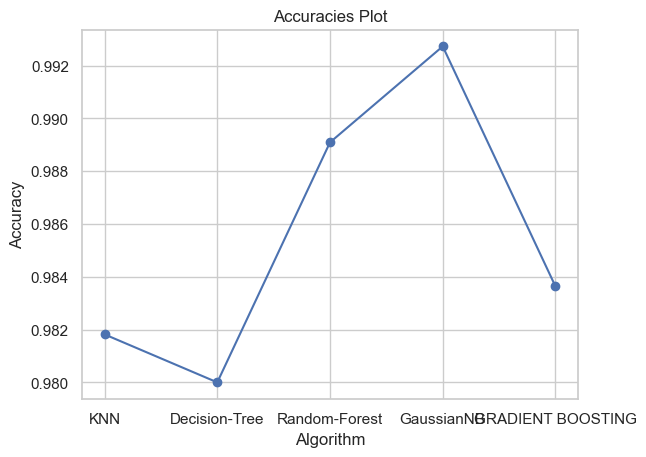

In [ ]:

accuracies = [acc1,acc2,acc3,acc4,acc6]
plt.plot(accuracies, marker='o', linestyle='-')
plt.title('Accuracies Plot')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(range(len(accuracies)), ['KNN', 'Decision-Tree', 'Random-Forest','GaussianNB','GRADIENT BOOSTING'])
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objects as go
accuracies = [acc1, acc2, acc3,acc4,acc6]
algorithms = ['KNN', 'Decision-Tree', 'Random-Forest','GaussianNB','GRADIENT-BOOSTING']
fig = go.Figure(data=go.Scatter(x=algorithms, y=accuracies, mode='markers+lines', marker=dict(symbol='circle', size=10), line=dict(width=2)))
fig.update_layout(title='Accuracies Plot', xaxis_title='Algorithm', yaxis_title='Accuracy')
fig.show()

In [ ]:
import pickle
# Save the model to disk
with open('crop_recommendation_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [ ]:
with open('crop_recommendation_model2.pkl', 'wb') as file:
    pickle.dump(rand_for, file)

In [ ]:
with open('crop_recommendation_model3.pkl', 'wb') as file:
    pickle.dump(gd_class, file)